# Yelp - Supervised Learning  

In [34]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import operator
import sklearn

from __future__ import division
%matplotlib inline

### Machine Learning - Classification on Yelp Data

![alt text](yelp.jpg "Cheers!")

In [2]:
f = open('review_sample.csv','rU')
review =  pd.read_csv(f)

test_acc_list = [] #test accuracies
train_acc_list = [] #train accuracies

In [3]:
review[:3]

,name,stars,text,useful,user_id,date
0,The Verdict's Inn,1.0,I've tried this place twice. The first time I...,1.0,M9jjjTEi5-4J_TTcbGPXaQ,2011-10-13
1,The Verdict's Inn,2.0,I really wanted this place to be good. Went th...,0.0,MgpsG2q7pJiQDQPzjHso3A,2012-08-09
2,The Verdict's Inn,5.0,ok..ridiculously addicted to their chopped sal...,0.0,j-d53KMsI11TA5Zqq_HQNw,2011-04-26


In [4]:
# training %80
# remaining %20
num_items = len(review)
percent_train = 0.80

num_train = int(num_items*percent_train)
num_test = num_items - num_train
print 'Training set', num_train, 'items'
print'Test set', num_test, 'items'

#splicing - index where you start up to index where you stop
reviewTrain = review[0:num_train]
# start at num_train and end at the end
reviewTest = review[num_train:]
print num_train

Training set 4072 items
Test set 1019 items
4072


In [5]:
target_names = ['1.0', '2.0', '3.0', '4.0', '5.0']

In [6]:
target = []
target = list(review['stars'])
print target
print len(target)   

[1.0, 2.0, 5.0, 4.0, 2.0, 3.0, 2.0, 4.0, 3.0, 3.0, 5.0, 3.0, 2.0, 4.0, 5.0, 3.0, 5.0, 5.0, 4.0, 1.0, 4.0, 5.0, 4.0, 1.0, 2.0, 3.0, 1.0, 3.0, 2.0, 2.0, 4.0, 2.0, 2.0, 4.0, 3.0, 2.0, 5.0, 1.0, 5.0, 4.0, 5.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 1.0, 4.0, 4.0, 4.0, 5.0, 4.0, 5.0, 1.0, 3.0, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 4.0, 1.0, 3.0, 5.0, 1.0, 4.0, 3.0, 5.0, 4.0, 2.0, 5.0, 4.0, 4.0, 2.0, 5.0, 5.0, 5.0, 4.0, 5.0, 5.0, 4.0, 5.0, 1.0, 3.0, 5.0, 5.0, 4.0, 5.0, 4.0, 3.0, 5.0, 5.0, 2.0, 4.0, 4.0, 4.0, 5.0, 1.0, 5.0, 5.0, 2.0, 4.0, 4.0, 4.0, 3.0, 5.0, 2.0, 4.0, 3.0, 1.0, 4.0, 5.0, 4.0, 5.0, 5.0, 3.0, 3.0, 3.0, 4.0, 2.0, 5.0, 1.0, 4.0, 2.0, 5.0, 3.0, 5.0, 5.0, 4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 4.0, 5.0, 4.0, 3.0, 5.0, 4.0, 1.0, 4.0, 4.0, 5.0, 5.0, 4.0, 5.0, 3.0, 4.0, 4.0, 3.0, 3.0, 5.0, 5.0, 3.0, 5.0, 5.0, 2.0, 3.0, 4.0, 4.0, 4.0, 3.0, 3.0, 4.0, 3.0, 5.0, 5.0, 3.0, 3.0, 3.0, 1.0, 3.0, 3.0, 4.0, 4.0, 5.0, 3.0, 4.0, 5.0, 3.0, 5.0, 4.0, 4.0, 2.0, 5.0, 3.0,

In [7]:
#rev = ['This is the first doc.', 'this is the second second doc.', 'and the thrid one.']
rev = []
rev = list(reviewTrain['text'])
print rev[0]
 
# print rev
rev_test = []
rev_test = list(reviewTest['text'])
print rev_test[0]
print len(rev)
print len(rev_test)

I've tried this place twice.  The first time I ate here, I ordered the "Bench Warrant" rice bowl.  Not totally disgusting and it got a few bites out of me.  Not impressed.  The second time I ordered an egg sandwich.  Who messes up an egg sandwich??  The Verdict's Inn does that's who!!!  Not only did they get my order wrong, the egg was disgusting, they used shredded cheese, and topped it with way too much spinach and lettuce.  I asked for no pico and guess what, my sandwich was drenched with it.  I'll NEVER eat here again!
No one picks up phone. Not even sure if phone line still works now. If the location is shut down, can this please be listed and shown as closed to not waste consumers time. Worst thing u can do is have someone show up and u aren't in business anymore.
4072
1019


In [8]:
allRev = []
allRev = rev + rev_test
print allRev[0]
print len(allRev)

I've tried this place twice.  The first time I ate here, I ordered the "Bench Warrant" rice bowl.  Not totally disgusting and it got a few bites out of me.  Not impressed.  The second time I ordered an egg sandwich.  Who messes up an egg sandwich??  The Verdict's Inn does that's who!!!  Not only did they get my order wrong, the egg was disgusting, they used shredded cheese, and topped it with way too much spinach and lettuce.  I asked for no pico and guess what, my sandwich was drenched with it.  I'll NEVER eat here again!
5091


In [9]:
#Tokenizing text with scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(allRev)
X_train_counts.shape


(5091, 17800)

In [10]:
print(count_vect.vocabulary_)

{u'rasamalai': 12625, u'raining': 12566, u'refridgerated': 12821, u'foud': 6370, u'foul': 6371, u'four': 6375, u'prices': 12187, u'woods': 17434, u'fout': 6378, u'hanging': 7369, u'woody': 17435, u'accueilli': 433, u'increase': 8119, u'originality': 11030, u'immature': 8028, u'sinking': 14262, u'eggrolls': 5246, u'verschiedenen': 16820, u'tantalizing': 15549, u'leisurely': 9118, u'stabbed': 14876, u'bringing': 2222, u'markers': 9663, u'basics': 1511, u'wooden': 17430, u'wednesday': 17158, u'broiled': 2245, u'solid': 14559, u'commented': 3419, u'chimichuri': 3061, u'specially': 14718, u'convo': 3705, u'preface': 12096, u'manner': 9606, u'scraped': 13759, u'originalit\xe9': 11031, u'\u3059\u3054\u3044\u306d': 17757, u'errors': 5525, u'tiered': 15919, u'thunder': 15898, u'cooking': 3711, u'salsify': 13492, u'designing': 4465, u'shocks': 14098, u'kartenvorbestellung': 8711, u'entertain\xe9': 5433, u'ching': 3069, u'china': 3064, u'natured': 10464, u'kids': 8784, u'elaborate': 5288, u'crock

In [12]:
wordMap = {}
i = 0
for key, value in count_vect.vocabulary_.iteritems():
    i += 1
    wordMap[key] = i
    print key, value

rasamalai 12625
raining 12566
refridgerated 12821
foud 6370
foul 6371
four 6375
prices 12187
woods 17434
fout 6378
hanging 7369
woody 17435
accueilli 433
increase 8119
originality 11030
immature 8028
sinking 14262
eggrolls 5246
verschiedenen 16820
tantalizing 15549
leisurely 9118
stabbed 14876
bringing 2222
markers 9663
basics 1511
wooden 17430
wednesday 17158
broiled 2245
solid 14559
commented 3419
chimichuri 3061
specially 14718
convo 3705
preface 12096
manner 9606
scraped 13759
originalité 11031
すごいね 17757
errors 5525
tiered 15919
thunder 15898
cooking 3711
salsify 13492
designing 4465
shocks 14098
kartenvorbestellung 8711
entertainé 5433
ching 3069
china 3064
natured 10464
kids 8784
elaborate 5288
crock 3967
45mins 213
spotty 14814
criticism 3961
golden 6941
cobblers 3313
zurrecht 17703
replace 12983
wizardry 17393
cocaine 3318
slivers 14394
hungry 7893
renamed 12950
symphony 15444
music 10362
therefore 15813
strike 15125
musik 10366
paperwork 11290
sortie 14627
lord 9366
lickin 91

starving 14946
aspects 1163
around 1092
gestured 6809
hve 7917
sums 15289
crusts 4016
dart 4188
dark 4179
traffic 16143
darn 4185
world 17454
darf 4176
dare 4173
sensational 13897
kenner 8745
crostini 3978
gimme 6840
kennen 8744
leute 9152
yessi 17570
grub 7176
fiver 6115
grum 7178
pickled 11670
tvs 16343
fived 6114
lobster 9305
demeaning 4396
diving 4797
pickles 11671
auskunft 1276
memories 9862
favourite 5925
jamacan 8470
911 316
refer 12797
biased 1765
squabble 14847
zest 17666
retains 13105
leadership 9049
sloppily 14400
thailand 15771
palmdale 11238
unattentive 16427
package 11186
briscola 2226
perturbed 11585
tatties 15603
lively 9276
homeless 7725
apologize 977
jonesing 8595
jerks 8536
confiture 3579
her 7572
hes 7594
hey 7606
lounging 9391
sealed 13790
hen 7564
heh 7531
yays 17545
wits 17389
conclue 3536
beginners 1624
survived 15377
unreliable 16576
with 17383
nimporte 10622
handsome 7363
pull 12386
rush 13408
october 10840
underdressed 16462
störte 15189
rage 12555
tripe 1624

tritt 16253
harbor 7396
eva 5586
eve 5592
fewer 5992
try 16288
race 12532
rack 12540
sissiclia 14280
mishap 10066
licensed 9166
imply 8051
video 16858
wheat 17239
spaghetti 14683
teamerica 15631
victor 16853
sauerkraut 13599
delicous 4369
raus 12644
expressed 5747
sweaty 15408
richmond 13182
consistently 3625
celiac 2791
sooooooooo 14610
flowing 6232
frühstück 6531
charade 2898
harassing 7395
renovierten 12960
seine 13857
punch 12395
licence 9164
adament 489
fifteen 6012
assises 1181
technical 15645
kareooke 8704
casino 2719
macayos 9476
resulting 13097
cousins 3836
mussel 10371
makes 9541
maker 9539
thats 15784
altho 764
steamers 14985
auswahl 1288
autant 1290
sieu 14200
dumbest 5056
causal 2756
confidence 3568
rico 13186
chocolates 3091
bush 2407
next 10576
eleven 5307
assuring 1201
humus 7884
mistruth 10095
forewarning 6327
midday 9957
baba 1377
babe 1378
upma 16636
wurden 17508
soooooooo 14609
rubbish 13376
actualy 484
placard 11788
gherkin 6824
customer 4087
devant 4506
donatos 48

reserve 13031
bulgar 2353
doped 4870
dopey 4871
enjoyed 5411
foraging 6309
rosson 13337
hrs 7843
création 4025
hrm 7842
cashews 2714
sehen 13853
adequate 514
rectangle 12764
personality 11570
ipad 8384
cappuccino 2603
sleepy 14365
hangings 7370
cardinals 2636
understaffed 16473
haunted 7442
nasty 10453
chanel 2869
subwayesque 15221
cleanly 3234
runs 13406
covering 3842
kneipe 8835
rung 13400
nichts 10598
complimenting 3496
etudes 5579
miserably 10061
extrmenly 5771
splotches 14787
flashed 6157
horrendous 7778
miserable 10060
pastel 11384
draws 4949
paszkis 11395
pasted 11383
away 1351
boyardee 2106
unable 16414
drawn 4948
pfft 11614
we 17139
terms 15724
wa 16985
diese 4568
wo 17395
wm 17394
handful 7348
wi 17307
wt 17502
ws 17501
answers 925
00pm 3
oomph 10952
kitchen 8819
bras 2142
essentially 5562
brat 2147
neeps 10505
brag 2120
brad 2119
exceeds 5637
disappears 4661
tone 16020
meateaters 9792
garnishing 6668
seinem 13858
condescending 3549
tons 16034
tony 16035
oblivious 10802
refil

relevé 12890
acutally 485
untoasted 16605
monte 10207
rootbeer 13322
month 10211
thoughtful 15870
cameron 2547
wernt 17215
sippage 14271
asada 1137
frisse 6486
calimari 2524
asade 1138
costco 3775
dumpling 5061
acceuille 403
foster 6369
danielle 4165
croquette 3972
dominated 4836
tzatziki 16370
resounding 13049
horror 7785
decide 4269
baristas 1479
marrow 9681
könnten 8908
30minutes 168
bavette 1541
circuit 3179
lunchgoers 9445
study 15159
anal 839
busing 2412
ass 1166
cookies 3709
instagram 8255
molcajates 10169
colossal 3380
streets 15112
unheard 16521
orgasm 11022
délicieuse 5121
hamper 7341
nani 10434
nano 10435
investing 8365
deliciousness 4367
thickness 15828
run 13398
scallops 13651
learned 9065
sucre 15239
millisecond 10004
loose 9362
vet 16834
promoted 12283
tracks 16128
kronos 8891
excess 5650
panacotta 11248
belize 1657
arena 1067
inspired 8253
thömmes 15908
whine 17267
fired 6086
fucus 6537
advertising 553
cathy 2749
aimer 640
nebenraum 10489
family 5849
requiring 13017
aim

saucisson 13596
molten 10178
verschwand 16821
fluff 6236
stout 15079
hands 7361
yugo 17623
handy 7365
prata 12072
brocolli 2244
risotto 13230
university 16545
slide 14374
gamblin 6630
frickin 6462
unevenly 16494
unwind 16617
qype 12526
700 275
702 276
constitute 3632
separating 13914
flys 6248
entertainment 5432
confess 3565
remiss 12933
geld 6735
cause 2757
cajeta 2499
stews 15018
inroom 8227
70s 278
türen 16375
tugend 16310
legends 9106
hostile 7803
determining 4496
gallina 6618
timer 15938
times 15940
counterpart 3803
intoxicated 8341
patstitio 11421
timed 15935
margaritas 9638
marsala 9684
swapped 15397
confuse 3581
tallarin 15525
zimt 17673
suya 15390
hehl 7533
awarded 1347
hehe 7532
totchos 16078
management 9572
disapproving 4670
data 4197
tinkering 15949
wrapper 17481
canteloupe 2588
wrapped 17480
perfectly 11534
nastiest 10452
manchego 9579
mariana 9649
lists 9260
chemicals 2997
ribsteak 13172
muertos 10326
woodfire 17431
catered 2741
heartedly 7505
cartoonish 2701
neapolitan 1

ginger 6848
seed 13838
unappetizing 16423
seen 13849
seem 13845
sounding 14636
seek 13842
tells 15670
todler 15985
divulge 4798
fitting 6112
wychwood 17513
davidson 4211
mashed 9700
impurities 8076
furai 6567
regular 12849
marie 9651
subtotal 15216
maria 9647
zealand 17652
assisting 1186
doi 4820
don 4841
observation 10810
dom 4832
mushy 10361
consumed 3642
dog 4816
doe 4812
competitors 3471
principle 12206
dop 4869
scotch 13744
annoyed 907
dot 4879
dou 4884
uncleared 16446
amending 799
coup 3814
lobsters 9306
ansprechend 921
huancayo 7854
fluffiest 6237
northeast 10686
medallions 9805
reccomendations 12710
explain 5726
sugar 15250
celery 2789
polenta 11909
folks 6276
disconnecting 4686
monica 10197
tiles 15931
appetizer 1001
watermelon 17123
pallets 11236
appetized 1000
mayos 9749
earl 5141
earn 5144
rajma 12573
nonsmoking 10665
obendrauf 10793
alzo 775
shaughnessy 14033
crusty 4017
discs 4702
goldenem 6942
rival 13235
grilled 7119
ears 5147
decides 4272
fascinating 5885
imitate 8024


parmigiana 11330
strait 15085
sleeping 14364
rolands 13286
sudden 15241
protein 12323
fumée 6550
creaky 3901
lava 9023
compiling 3473
buritto 2387
standouts 14915
extended 5753
resturants 13091
companion 3444
diversion 4789
climbing 3257
crêpe 4026
largely 8978
macro 9492
roughly 13352
solve 14568
potstickers 12038
bumping 2365
intime 8332
nah 10418
consisted 3622
outdoor 11068
affair 565
money 10194
adjustments 524
sights 14204
pissing 11748
flavor 6168
lightbulbs 9193
clueless 3289
vorbestellte 16955
pomfret 11930
pile 11706
kickboxing 8773
grit 7136
griz 7139
leslieville 9135
oscillent 11040
grin 7128
hydrated 7922
adams 490
journée 8605
serves 13932
server 13929
facing 5805
indisputably 8148
either 5286
served 13928
passionate 11376
cabo 2477
pittsburg 11762
naan 10404
rable 12531
pronounce 12293
images 8013
carrburrito 2678
sauber 13588
sommer 14584
40cl 203
quoique 12521
outs 11080
reportedly 12999
confirm 3574
drenched 4961
stages 14892
extensively 5757
oignon 10886
yelping 1756

brochettes 2241
disappointments 4667
prisoner 12214
sally 13483
payment 11438
michelin 9940
beets 1614
stranded 15087
request 13008
disease 4708
傳統的蒸點以及在開放式廚房現做 17769
gelee 6736
vapiano 16723
skinny 14336
normally 10683
divalo 4782
thicken 15825
poori 11954
doughy 4898
hamlet 7339
rotating 13340
couté 3837
thicker 15826
staff 14886
inspiring 8254
satay 13574
grabbed 7006
knowledge 8851
chilies 3045
sonofabitch 14596
prancing 12070
emitting 5342
regularly 12850
starch 14924
unbeatable 16432
coworker 3849
perfection 11533
gnocci 6920
awkwardness 1365
fixes 6120
teams 15633
blogspot 1926
klebrige 8823
fixed 6119
showdown 14145
schreibt 13714
intensity 8287
enhanced 5406
greece 7086
awaits 1345
fremd 6434
pattern 11422
ralph 12578
difficulties 4583
bruno 2282
confusion 3584
lengua 9127
refreshing 12818
kreuz 8888
voucher 16969
dispensing 4735
cauliflower 2755
antics 935
cassellas 2721
firmness 6095
pimpin 11719
eatcrest 5166
commenting 3420
rime 13210
joke 8586
taking 15508
equal 5493
kosh

companions 3445
everything 5609
loins 9332
intolerant 8340
hunk 7895
bisque 1834
wahnsinn 17004
vielleicht 16862
disappeared 4659
discount 4689
lamps 8955
permitted 11555
plug 11864
dinned 4626
cowboy 3847
razzle 12655
plum 11865
choke 3099
dinner 4627
montana 10206
plus 11870
duke 5046
donates 4846
aber 346
unsalted 16581
ahh 627
ahi 628
geeignet 6713
bath 1527
ahs 630
ppv 12064
rotti 13349
beehives 1605
sinne 14264
existed 5686
biz_photos 1855
kellnerin 8741
sneezing 14493
transform 16166
frustrations 6522
gib 6830
crews 3939
chargrilled 2913
naught 10466
questionable 12491
intolerance 8339
amateur 784
proudly 12331
schauen 13688
italien 8430
heinous 7541
anwohner 948
barrio 1487
flavour 6174
malaysia 9551
loitering 9333
ruined 13389
phosphate 11642
verging 16802
eachother 5134
forearm 6318
peruvian 11592
shined 14072
voisin 16935
sometime 14579
cobbler 3312
shines 14073
annoying 908
marys 9695
whereas 17253
tester 15746
when 17248
johhny 8575
setting 13957
looses 9364
whew 17258
whe

église 17725
influences 8179
gäste 7264
talapia 15513
cookin 3710
acknowledging 463
ubiquitous 16380
goopy 6968
alchimiste 679
ballsy 1433
615 254
langley 8966
lighting 9196
adventure 545
softball 14540
proclaimed 12241
jovi 8608
short 14114
shadu 13993
susan 15378
venezuelan 16773
shady 13994
artful 1118
shore 14113
arizona 1079
began 1619
turnover 16334
ailoi 637
essence 5560
isnt 8416
broths 2259
milwaukee 10005
avenue 1321
vaughan 16739
disagreed 4654
style 15182
quizno 12517
pray 12076
beyonce 1749
clashes 3208
resort 13047
parts 11360
guan 7199
birdcages 1820
bout 2092
soccer 14522
remplissait 12945
wouldn 17471
somebody 14571
sucking 15236
cannoli 2581
hunter 7898
15am 70
adventurous 546
instructions 8269
gewartet 6817
mussten 10374
cheesefries 2984
fantreff 5868
thy 15905
accommodated 408
intolerable 8338
intérieur 8355
weight 17178
peeps 11485
habitudes 7287
brother 2257
duchess 5031
loopy 9361
expect 5702
standards 14910
prolly 12272
alcohol 681
wondered 17418
idee 7960
hill 

stonecrop 15060
term 15722
frighteningly 6477
facial 5801
denser 4414
press 12155
coincidence 3346
alcools 684
racists 12539
gerichre 6786
miami 9935
perpetual 11560
ulyra 16399
feigned 5958
hosts 7805
flavourfully 6177
panzanella 11280
eingerichtet 5279
yuuum 17645
exceed 5634
tumble 16312
scared 13663
rentrait 12963
recouvert 12758
meatloaf 9798
jeremy 8533
ineffcient 8166
kleinen 8826
totts 16081
kleines 8828
campfire 2555
morceau 10230
pasty 11394
ripped 13223
tenure 15710
dangling 4162
servies 13945
tiède 15969
mcalister 9760
pasto 11388
pasta 11379
fluorescent 6241
paste 11382
chowmein 3126
pike 11703
rare 12618
pika 11702
universe 16543
gorgonzola 6975
ndg 10478
carries 2685
carrier 2684
sweat 15405
estimatore 5571
polished 11914
travelers 16196
loner 9342
weather 17147
promise 12276
fish 6098
foie 6263
favoritess 5919
transfer 16163
kidding 8782
extravagant 5765
vat 16738
alexa 692
catsup 2751
unwrap 16619
mutter 10381
volume 16939
granny 7046
chapatas 2888
squeeze 14858
geblie

cleanliness 3233
cloud9 3279
current 4063
freaks 6421
falling 5839
freaky 6422
creepiest 3928
找現金時一定要核對賬單 17780
grandparents 7042
bi 1760
présentés 12350
contemplate 3658
fistfuls 6107
bj 1860
mittelmaß 10108
alone 740
along 741
addictingly 497
studied 15157
wherever 17255
cholo 3105
commonly 3429
jammin 8480
crumbled 3999
cabela 2474
ipa 8383
love 9395
radish 12547
prefer 12098
bloody 1932
marvelous 9692
07319 13
allais 705
skillets 14325
angestellten 879
allait 706
northlake 10688
positive 12000
runnymede 13405
wood 17429
wondering 17422
kasse 8714
loving 9404
introducing 8346
afford 574
apparent 985
oregon 11012
odious 10849
visual 16914
degrade 4346
folgen 6273
honey 7739
valued 16712
heineken 7540
believer 1655
vega 16744
values 16713
slowness 14407
vege 16749
believed 1654
bêtement 2463
restaurants 13070
teaspoons 15642
pourrait 12050
offense 10859
evidently 5616
winter 17363
deserves 4457
coyotes 3851
divided 4793
grosser 7150
grosses 7151
elephant 5303
grossed 7149
convienient 

freshly 6450
browns 2268
unattended 16426
creature 3920
plant 11810
plans 11809
deutlich 4503
notre 10722
gloppy 6898
backyard 1392
plank 11805
snotty 14504
deviled 4517
rowdy 13363
tentacles 15706
wrench 17487
patio 11409
pans 11275
mexican 9924
baies 1408
pant 11276
bowl 2096
trade 16133
attitude 1239
pang 11264
généreuse 7269
pani 11267
490 217
its 8437
eines 5276
alle 707
rapidly 12613
alla 704
pronto 12295
frapiato 6406
travelling 16198
snobs 14499
skipped 14339
fußballfans 6587
propose 12307
wirkt 17374
soggier 14545
wasabi 17095
piazzetta 11656
eggbatter 5241
kankacho 8696
walkers 17036
buffering 2334
hotdogs 7809
würziger 17518
reassured 12698
gestaltung 6806
always 773
copine 3732
loosely 9363
events 5598
experiencing 5716
1am 98
wateringly 17122
disorganized 4732
week 17163
england 5402
getränke 6813
police 11910
tonite 16029
eggroll 5245
tahiti 15491
anyhoo 953
blues 1949
nicaraguan 10586
really 12688
silky 14223
apportent 1018
missed 10077
bonham 2010
allé 730
pepperjack 11

broccoli 2238
mosaic 10251
concordance 3540
discounted 4690
acknowledgement 461
colour 3381
greatservice 7083
command 3411
caramelized 2621
lest 9140
bananas 1443
less 9136
moments 10182
paul 11426
glue 6908
räumlichkeiten 13423
generous 6758
residential 13038
eldorado 5295
drawback 4946
combine 3391
teriyaki 15721
fluctuating 6234
increased 8120
haut 7449
haus 7447
故意找錯 17782
haul 7440
five 6113
desi 4460
desk 4470
belgium 1651
sandwichs 13544
descendant 4441
reddstone 12773
crisp 3949
onion 10936
sandpapery 13538
garage 6650
bravas 2156
scenic 13679
prevention 12180
replacement 12985
foreseeable 6322
sinews 14249
almonds 735
thier 15829
murs 10352
transport 16177
afterword 591
jalapeno 8461
literally 9267
avoid 1331
does 4813
définitivement 5114
forgiven 6335
truffle 16277
avoir 1335
reccommend 12711
schedule 13689
zips 17680
zipp 17678
cops 3733
hiding 7621
gained 6608
sister 14282
asks 1158
ingest 8193
angeles 871
seeds 13839
insufficient 8270
catherine 2748
theyd 15822
roads 13248

zone 17684
honoring 7751
malley 9558
flash 6154
busboy 2405
génial 7267
cettinad 2829
brown 2263
protective 12322
3am 190
blase 1885
ihnen 7989
brownie 2265
vegan 16745
vegas 16747
trouble 16267
blast 1886
margarita 9637
aggressively 606
beignets 1639
ragin 12557
fragile 6385
smooching 14459
defacto 4313
carte 2695
partager 11343
sleeveless 14366
sidewalk 14197
upper 16638
hte 7845
brave 2157
regret 12847
bravo 2159
repetitive 12982
discover 4693
professionalism 12258
hts 7848
vraie 16975
pozole 12061
assistance 1183
ragging 12556
bestellung 1723
subsitute 15203
satisfy 13583
supporting 15335
alina 699
andino 858
unsure 16595
changs 2876
peeled 11482
apache 967
gorge 6973
rubbery 13374
appears 995
change 2871
buck 2309
buch 2306
buco 2316
buca 2304
debuzze 4249
lakers 8944
trial 16227
consistait 3620
chesterfield 3008
montreal 10214
homeward 7732
italiana 8425
hiking 7641
marked 9662
italiano 8428
sincerely 14247
italians 8429
papago 11284
restruant 13088
rarely 12619
market 9664
stoma

afer 564
surprisingly 15366
advising 557
broke 2246
browned 2264
hurry 7904
appetitite 999
rips 13225
grenzwertig 7107
coalition 3302
unionhouse 16534
nine 10623
spontaneous 14799
vivaldi 16922
pushes 12430
93rd 319
voided 16931
pushed 12429
fuentes 6539
lacks 8929
string 15127
comfortable 3404
chops 3115
stayed 14967
conserve 3608
können 8906
mi 9933
idaho 7954
fr 6383
ft 6533
fu 6534
rude 13380
derived 4438
fa 5786
tries 16238
resümee 13100
ff 5993
fi 5995
gass 6673
gast 6674
fo 6250
kein 8737
mcduke 9769
overnight 11129
slacking 14350
bready 2170
ego 5251
inline 8211
breads 2167
egg 5240
35m 179
chicks 3031
torturous 16064
chicky 3032
annoyingly 909
committed 3427
comfortably 3405
connait 3590
shotty 14128
reluctance 12904
actually 483
genussi 6774
peanuts 11460
fool 6297
karaage 8701
motivated 10269
food 6288
floating 6212
portillos 11984
foot 6302
superbe 15311
étudiants 17740
seaoned 13794
staples 14921
desperately 4472
fully 6549
payed 11436
dint 4631
trailer 16145
referred 1280

buyer 2441
leben 9079
ascended 1141
shu 14165
parlors 11323
ouverte 11091
dishing 4720
chickpea 3029
sha 13986
she 14040
contain 3650
ressorti 13064
aamazing 337
fru 6511
aegean 559
transcendent 16160
computer 3520
powder 12055
unsweetened 16597
creating 3914
statt 14962
joys 8613
luz 9456
horribly 7782
willpower 17337
state 14949
correctly 3763
horrible 7781
lui 9430
neither 10527
nutritious 10770
attention 1232
sorely 14619
munching 10342
importance 8053
efficiency 5231
approval 1032
precious 12083
distribution 4772
mindy 10017
gingery 6851
dumplingphile 5062
lebo 9080
attached 1219
touristique 16100
minds 10015
wäre 17515
sesam 13950
jersey 8538
spritzed 14836
spandex 14689
gâtée 7262
competent 3465
rashers 12627
1997 96
sambar 13514
addition 503
chanté 2883
treat 16205
costumers 3781
senses 13901
diversity 4790
digged 4591
30mins 167
potentiels 12034
sensed 13899
mail 9516
kicks 8779
brunch 2277
otu 11051
brüller 2297
main 9518
yinzers 17581
harder 7400
chalk 2851
gucci 7207
kabobs

checkout 2960
kunstleder 8898
outweighs 11089
drinkable 4976
incredulous 8125
acceptable 396
disconcerting 4683
ooh 10950
mouthing 10288
downtown 4919
downing 4912
savior 13628
olive 10914
slurping 14412
malai 9549
fly 6243
walled 17041
mmhmm 10122
tokyo 15998
avoiding 1334
soul 14632
wallet 17042
sous 14655
sour 14645
groß 7170
9th 329
growing 7165
eeeeew 5220
arrive 1102
bites 1847
dosage 4875
claim 3195
crazy 3900
predict 12091
bottomline 2070
overzealous 11152
anzugeben 965
wayyyy 17136
pink 11727
middlefield 9959
ping 11726
pine 11722
chemical 2996
till 15932
sunday 15293
pure 12412
swore 15438
tile 15930
nyc 10777
puri 12416
sworn 15439
pint 11734
rivaled 13236
wafting 17002
staying 14969
designed 4464
gros 7147
guys 7250
grow 7164
relinquish 12897
permet 11551
taquenos 15561
facile 5802
maybe 9744
tapas 15555
avant 1315
fluent 6235
burmese 2390
youthful 17609
arrivé 1108
gesture 6808
cute 4093
sashimis 13571
taverna 15612
pointed 11893
immer 8034
entrails 5453
terrace 15725
cuts

pluralized 11869
slingers 14387
bedient 1594
soasmuch 14517
transitional 16170
rebranded 12704
griddle 7112
endeavor 5378
wrongfully 17497
devils 4520
tended 15691
individual 8150
medley 9817
tender 15693
vins 16891
chose 3120
tamales 15528
visiting 16907
positivity 12003
please 11848
halves 7329
smallest 14421
myriad 10385
flavoured 6175
feasted 5936
donate 4844
jarlesboug 8497
consierge 3617
historical 7675
po 11878
cubes 4031
aloe 738
brunches 2279
solely 14557
annual 910
aloo 743
alot 746
upgraded 16631
consume 3641
supply 15331
fahita 5815
smother 14467
newborn 10568
dietary 4573
throughout 15886
headaches 7480
platinum 11827
mikes 9981
raise 12568
tgif 15766
panera 11262
creativity 3918
mikey 9982
secret 13825
sandiwches 13537
meeting 9822
kathy 8720
priced 12186
kathi 8718
pricey 12189
understand 16475
türe 16374
diamondbacks 4544
fut 6580
fur 6566
coventry 3838
entré 5462
bill 1798
tolerate 16002
fux 6583
cluster 3293
missteps 10083
mimosas 10007
fun 6551
sriracha 14870
omelett

judgment 8622
shitting 14088
insure 8275
retard 13106
kernals 8750
freshest 6449
0820 15
rapini 12614
overshadowed 11140
thought 15869
oops 10956
sets 13955
position 11997
floored 6215
latest 9000
fixated 6117
tabouli 15474
proximity 12344
executive 5673
domestic 4833
eyesight 5783
clinic 3259
seats 13813
dakota 4137
hom 7718
topping 16047
pondicherry 11937
6bux 266
tong 16023
lake 8943
bench 1680
raved 12646
voila 16932
ghee 6823
wining 17356
reallllllly 12686
cristof 3957
punctual 12398
fyi 6589
queensway 12475
skimping 14332
royalty 13368
deployment 4428
audibly 1255
inviting 8373
sofa 14537
11pm 48
balmoral 1434
ordinaire 11007
heed 7527
works 17453
soft 14539
largish 8983
nfl 10579
alive 701
stuffs 15165
upcharge 16623
stuffy 15166
est 5564
esq 5552
esp 5544
students 15156
economical 5190
voilà 16933
ralf 12576
esk 5542
trap 16179
hose 7791
slight 14379
snapper 14485
pukes 12383
taptv 15560
host 7797
disastrous 4673
hospitable 7793
snapped 14484
kadie 8678
periodically 11544
noisy

spiced 14750
gisseppi 6864
1960 87
cashier 2715
chocolate 3089
drown 5006
dismal 4728
zubereitung 17691
bouches 2073
meathead 9794
modified 10154
flagship 6135
generell 6755
laughter 9016
slightest 14380
streak 15104
deservedly 4456
stream 15106
amalgame 780
brandillynn 2136
dropped 5000
requirements 13015
secured 13833
eloquent 5319
alway 772
endorsement 5385
speaks 14710
umgebung 16404
flavored 6169
unbelievable 16435
ballroom 1431
cinnabun 3174
rinky 13215
granddaughter 7034
stil 15028
marbling 9627
fußball 6585
birthday 1824
tipped 15953
noise 10651
snoozerbowl 14501
renovation 12958
unbelievably 16436
reposition 13000
prob 12225
hogly 7699
branches 2131
stupidly 15178
amuse 833
nonni 10663
ones 10934
glancing 6877
innenstadtniveau 8216
flagged 6132
dés 5126
refund 12825
exclusive 5660
banquette 1461
thaiger 15770
mainly 9521
motions 10268
shiitake 14067
worship 17463
blocked 1920
intimité 8336
felicia 5959
appetizers 1002
patsitsio 11420
干炒牛河 17778
reubens 13129
samosas 13521
cutt

hiw 7684
franklins 6402
bambini 1440
whistle 17279
hic 7615
mieux 9971
applebee 1007
gefühl 6720
him 7648
hin 7651
sustainably 15388
noises 10652
hersey 7590
activity 478
accueillis 435
accueillir 434
consciously 3603
lau 9010
55pm 241
stump 15171
dump 5058
gawd 6691
intelligence 8280
thistly 15860
giordanos 6856
dumb 5053
are 1063
recommen 12748
cleverly 3246
explosion 5741
bark 1480
arm 1081
barn 1482
crunching 4007
empanada 5347
grainfiti 7026
learns 9067
glistening 6892
nailed 10421
vont 16950
nutella 10767
slapped 14354
creme 3932
various 16732
crema 3931
consecutive 3604
watchin 17115
recently 12717
initially 8204
succeed 15222
condo 3557
license 9165
finde 6063
riveling 13239
riddled 13191
copycatted 3734
became 1580
chaude 2939
derartigen 4435
cronuts 3971
espaniola 5545
flies 6196
reasons 12697
dinning 4629
erforderliches 5507
whelk 17245
semaines 13884
ranchero 12588
bolster 1995
dui 5045
pp 12062
pv 12438
dum 5052
dun 5067
pu 12362
hoops 7761
dub 5028
overlook 11123
swd 1540

In [13]:
print wordMap


{u'rasamalai': 1, u'raining': 2, u'refridgerated': 3, u'foud': 4, u'cussed': 8790, u't\xfcre': 14773, u'fagoli': 13703, u'foul': 5, u'four': 6, u'gag': 5831, u'woods': 8, u'travaux': 8792, u'boogie': 8838, u'fout': 9, u'preface': 33, u'bistroid': 8794, u'woody': 11, u'genre': 12495, u'apportez': 16316, u'accueilli': 12, u'increase': 13, u'midafternoon': 8796, u'zillions': 13256, u'advantage': 16147, u'wizardry': 60, u'cycling': 11948, u'originality': 14, u'list': 11217, u'fu\xdfballabend': 8800, u'funk': 10317, u'filbertos': 8801, u'lord': 72, u'immature': 15, u'mackerel': 8803, u'flabbergasted': 17172, u'sinking': 16, u'mozarella': 10318, u'hormone': 8805, u'kannapolis': 8806, u'kent': 16319, u'hostest': 8807, u'deli': 8808, u'regional': 8809, u'sufficient': 17616, u'eggrolls': 17, u'verschiedenen': 18, u'tantalizing': 19, u'leisurely': 20, u'hibernating': 8811, u'stabbed': 21, u'bringing': 22, u'1hour': 7283, u'ackermanns': 8813, u'basics': 24, u'internally': 8814, u'prize': 8815, u'

In [14]:
print len(wordMap)

17800


In [15]:
numCol = len(wordMap) + 1 # add one for stars column
numRev = len(allRev)#7191

s = (numRev, numCol) 
grid = np.zeros(s)
print numCol
print numRev
print grid

17801
5091
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [17]:
# Go through each entry in word list, if exists in DF, add number, otherwise put in 0
# fill entire table
from string import punctuation
from future_builtins import map  # Only on Python 2
from collections import Counter
from itertools import chain

row_num = 0
#numCol = 18549
for eachRev in allRev:   
    linewords = eachRev.translate(None, punctuation).lower().split()
    freqList = Counter(linewords)
    
    for key,value in freqList.iteritems():
        key = key.decode('utf-8')
        if key in wordMap.keys() :
            col_num = int(wordMap[key])  
            #print row_num, col_num - 1
            #print len(grid)
            grid[row_num][col_num - 1] = int(value)
            grid[row_num][numCol-1] = target[row_num]
            #print value
    row_num += 1
#print grid
    

In [20]:
print grid[0][numCol-1] #last column

1.0


#### Part 1) (4 points)

Create training and test sets. Use 80% of the data for training and remaining 20% for testing.

In [21]:
index = list(range(0, numRev))
columns = list(range(0, numCol)) #18549 + 1, print 0...18549

df = pd.DataFrame(grid, index=index)
print df[:1]

   0      1      2      3      4      5      6      7      8      9      \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   ...    17791  17792  17793  17794  17795  17796  17797  17798  17799  17800  
0  ...      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0  

[1 rows x 17801 columns]


In [22]:
#splicing - index where you start up to index where you stop
starsTrain = df[0:num_train]
# start at num_train and end at the end
starsTest = df[num_train:]


#### Part 2) (8 points)
Implement the function "train_and_test_classifier". 

The purpose of having a function is so you don't need to rewrite the code for every classifier you try. Instead, you can pass the classifier into this function.

We provided the function header and the description of the function. You can follow along the code from the lecture example in lecture_10_classification_part_1.ipynb.

In [23]:
def train_and_test_classifier(classifier, features, target, train_data, test_data, verbose=False):  
    """
    fits a classifier to the provided training data, prints out and returns the prediction 
    accuracy on both training and test sets.
    
    Parameters:
    -----------
    classifier: The classifier object, e.g. KNN classifier
    features: a list of data frame columns to use as features. 
                E.g. ["latitude", "longitude"]
    target: the data frame column to use as target. E.g. "category"
    train_data: a Pandas data frame containing the training data
    test_data: a Pandas data frame containing the test data
    verbose: If True, prints out the predicted value and the actual value 
                for every sample for both training and test sets.
                
    Returns:
    --------
    train_acc: accuracy on training set
    test_acc: accuracy on test set
    """
    
    classifier.fit(train_data[features], train_data[target])
    
    # Make predictions on training data
    train_predictions = classifier.predict(train_data[features])
    # Make predictions on test data
    test_predictions = classifier.predict(test_data[features])
    
    # Calculate training accuracy
    num_train = len(train_data)
    num_test = len(test_data)

    train_correct = 0
    for i in range(num_train):
        if verbose == True:
            print 'Predicted:', train_predictions[i], ' Actual:', train_data.ix[i][target]
        if train_predictions[i] == train_data.ix[i][target]: 
            train_correct +=1
    
    # Calculate test accuracy
    test_correct = 0
    for i in range(num_test):
        if verbose == True:
            print 'Predicted:', test_predictions[i], ' Actual:', test_data.ix[num_train + i][target]
        if test_predictions[i] == test_data.ix[num_train + i][target]: 
            test_correct +=1
    
    train_acc = float(train_correct)/float(num_train)
    test_acc = float(test_correct)/float(num_test)
    
    return train_acc, test_acc

#### Logistic Regression 
This model uses every unique word and its frequencies to predict the *star* rating of the test reviews. 

In [25]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
features = columns #features_list# all unique words is a feature
target = numCol - 1 #last index
train_data = starsTrain
test_data = starsTest
res = train_and_test_classifier(classifier, features, target, train_data, test_data, verbose=False)
print res

train_acc_list.append(res[0])
test_acc_list.append(res[1])

print "train_acc_list {}".format( train_acc_list )
print "test_acc_list {}".format( test_acc_list)

#train_and_test_classifier(classifier, features, target, train_data, test_data, verbose=True)

(0.9965618860510805, 0.6702649656526006)
train_acc_list [0.9965618860510805]
test_acc_list [0.6702649656526006]


#### K Nearest Neighbors (KNN)

Train and test accuracies reported for k in [1,2,5,10,20].

In [26]:
from sklearn.neighbors import KNeighborsClassifier

results = []
neighbors = [1,2,5,10,20]
for i in range(5):
    classifier = KNeighborsClassifier(n_neighbors=neighbors[i])
    features = columns
    target = numCol - 1
    train_data = starsTrain
    test_data = starsTest
    res = train_and_test_classifier(classifier, features, target, train_data, test_data, verbose=False)
    print res
    results.append(res)

    #train_and_test_classifier(classifier, features, target, train_data, test_data, verbose=True)

best_res = max(results, key=operator.itemgetter(1))
train_acc_list.append(best_res[0])
test_acc_list.append(best_res[1])
print train_acc_list
print test_acc_list

(1.0, 0.48282630029440626)
(0.7902750491159135, 0.4681059862610402)
(0.7197937131630648, 0.5515210991167812)
(0.6645383104125737, 0.5534838076545633)
(0.6227897838899804, 0.5829244357212954)
[0.9965618860510805, 0.6227897838899804]
[0.6702649656526006, 0.5829244357212954]


In [27]:
# As K increases, train accuracy decreases, test accuracy decreases, increases then decreases again.

# K = 1 gives you the highest test accuracy

#### Decision trees with the following settings for the split parameter:

Train and test accuracies reported for split in [2,4,10,20,40]

In [28]:
from sklearn.tree import DecisionTreeClassifier
split = [2,4,10,20,40]
results = []
for i in range(5):
    classifier = DecisionTreeClassifier(min_samples_split=split[i])
    features = columns
    target = numCol - 1
    train_data = starsTrain
    test_data = starsTest
    res = train_and_test_classifier(classifier, features, target, train_data, test_data, verbose=False)
    print res
    results.append(res)

    #train_and_test_classifier(classifier, features, target, train_data, test_data, verbose=True)

best_res = max(results, key=operator.itemgetter(1))
train_acc_list.append(best_res[0])
test_acc_list.append(best_res[1])
print train_acc_list
print test_acc_list

(1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
[0.9965618860510805, 0.6227897838899804, 1.0]
[0.6702649656526006, 0.5829244357212954, 1.0]


In [29]:
# split = 20, yields the highest test accuracy

#### Random forests 
(Note results differ from run to run since there is randomness involved.)
Train and test accuracies reported for n_trees in [1,2,5,10,20] and results plotted.

In [30]:
from sklearn.ensemble import RandomForestClassifier

trees = [1,2,5,10,20]
results = []
plot_train = []
plot_test = []
for i in range(5):
    classifier = RandomForestClassifier(n_estimators=trees[i])
    features = columns
    target = numCol - 1
    train_data = starsTrain
    test_data = starsTest
    res = train_and_test_classifier(classifier, features, target, train_data, test_data, verbose=False)
    print res
    results.append(res)
    plot_train.append(res[0])
    plot_test.append(res[1])
    
    
    #train_and_test_classifier(classifier, features, target, train_data, test_data, verbose=True)

best_res = max(results, key=operator.itemgetter(1))
train_acc_list.append(best_res[0])
test_acc_list.append(best_res[1])
print train_acc_list
print test_acc_list


(0.7912573673870335, 0.39842983316977426)
(0.7605599214145383, 0.3150147203140334)
(0.968811394891945, 0.5063788027477919)
(0.9960707269155207, 0.5593719332679097)
(0.9997544204322201, 0.6005888125613347)
[0.9965618860510805, 0.6227897838899804, 1.0, 0.9997544204322201]
[0.6702649656526006, 0.5829244357212954, 1.0, 0.6005888125613347]


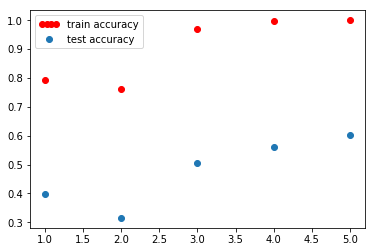

In [31]:
class_model = [1,2,3,4,5]

plot1, = plt.plot(class_model, plot_train, 'ro', label='train accuracy')
plot2, = plt.plot(class_model, plot_test, 'o', label='test accuracy')

plt.legend(handler_map={plot1: HandlerLine2D(numpoints=4)})
plt.show()

#### Gaussian naive Bayes.

In [32]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
features = columns
target = numCol - 1
train_data = starsTrain
test_data = starsTest
res = train_and_test_classifier(classifier, features, target, train_data, test_data, verbose=False)
print res

#train_and_test_classifier(classifier, features, target, train_data, test_data, verbose=True)

train_acc_list.append(res[0])
test_acc_list.append(res[1])

print train_acc_list
print test_acc_list

(1.0, 0.7438665358194309)
[0.9965618860510805, 0.6227897838899804, 1.0, 0.9997544204322201, 1.0]
[0.6702649656526006, 0.5829244357212954, 1.0, 0.6005888125613347, 0.7438665358194309]


#### Solution Plots
train and test accuracies plot showing all models in a single plot using matplotlib. On the x-axis, we have the models, on the y-axis the accuracies.

For KNN, Decision Tree and Random Forests, we are use the parameter setting that yielded the highest test accuracy. 

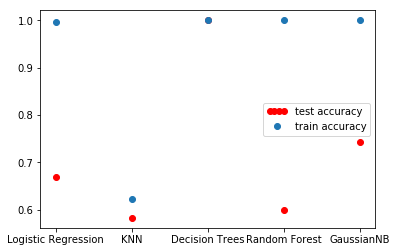

In [35]:
class_model = [1,2,3,4,5]

my_xticks = ['Logistic Regression', 'KNN', 'Decision Trees', \
                       'Random Forest', 'GaussianNB']

plt.xticks(class_model, my_xticks)
plot1, = plt.plot(class_model, test_acc_list, 'ro', label='test accuracy')
plot2, = plt.plot(class_model, train_acc_list, 'o', label='train accuracy')

plt.legend(handler_map={plot1: HandlerLine2D(numpoints=4)})
plt.show()
